In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Dimensionality reduction and clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Feature selection and evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression

# Model building
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score, mean_absolute_error



In [2]:
url = 'https://drive.usercontent.google.com/download?id=1clIQ8Rj1hOJz6F4tDj5iJCaRvxXyMABI&export=download&authuser=0&confirm=t&uuid=811b757b-2100-43f9-80aa-a0c10a52ad06&at=APZUnTWztJ89713JpEU-p0LG3dKo:1721408003556'
df = pd.read_csv(url)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df.iloc[1]

,1
ID,5635
Customer_ID,3392
Month,2
Name,Aaron Maashoh
Age,23.0
SSN,821000265.0
Occupation,Scientist
Annual_Income,19114.12
Monthly_Inhand_Salary,1824.843333
Num_Bank_Accounts,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [6]:
df.describe(include = 'object').T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [7]:
df['Delay_from_due_date'].value_counts()

,count
Delay_from_due_date,
15.0,3596
13.0,3424
8.0,3324
14.0,3313
10.0,3281
...,...
59.0,528
39.0,525
43.0,502


In [8]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [9]:
df['Type_of_Loan'].nunique() #too many unique values in type of loan.

6261

In [10]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [11]:
df['Customer_ID'].nunique()

12500

In [12]:
df['Name'].nunique()

10128

In [13]:
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [14]:
df['Age'].unique()

array([23., 28., 34., 54., 55., 21., 31., 33., 30., 24., 44., 45., 40.,
       41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

Exploratory Analysis so far:

1) Dataset has 100000 rows and 28 columns

2) Out of 28 columns, 7 are categorical columns and rest are Numerical columns

3) There are 12500 unique values in the customer ID column, indicating that there is data of 12500 customers

4) There are 8 unique values in Month column, indicating that there is data of 12500 customers from Januray to August.



**DATA PRE-PROCESSING- Missing values, Outliers and Encoding**

In [15]:
df.isnull().sum() #No misssing values

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


[Text(0.5, 1.0, 'Credit Score based on Occcupation')]

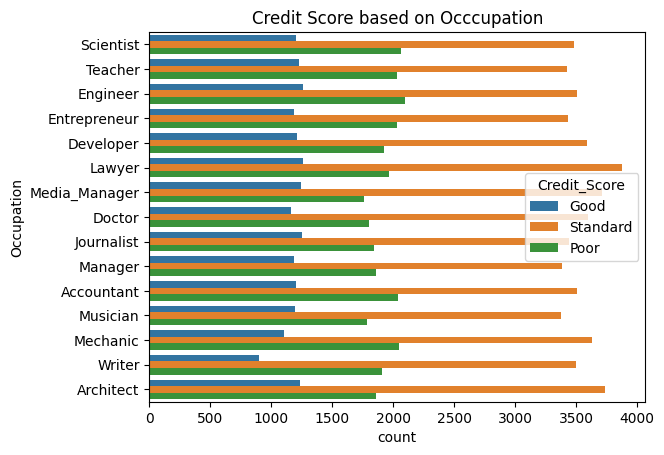

In [16]:
sns.countplot(y='Occupation', hue='Credit_Score', data=df).set(title='Credit Score based on Occcupation')

<Axes: xlabel='count', ylabel='Credit_Mix'>

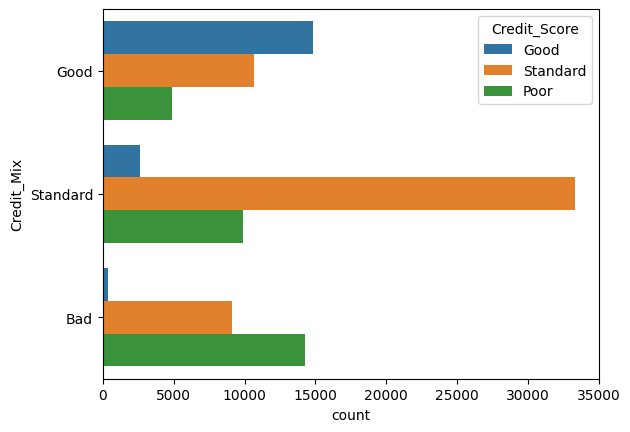

In [17]:
sns.countplot(y='Credit_Mix', hue='Credit_Score', data=df)

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

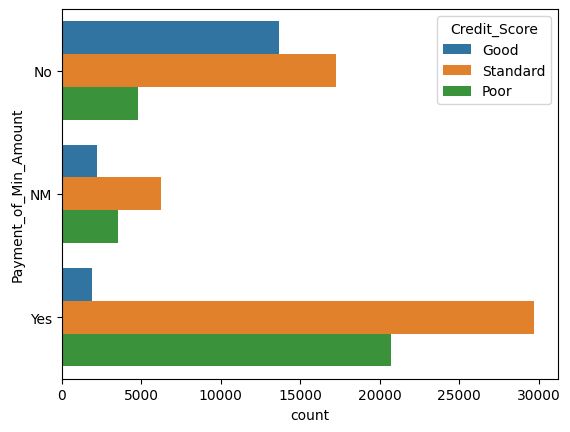

In [18]:
sns.countplot(y='Payment_of_Min_Amount', hue='Credit_Score', data=df)

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

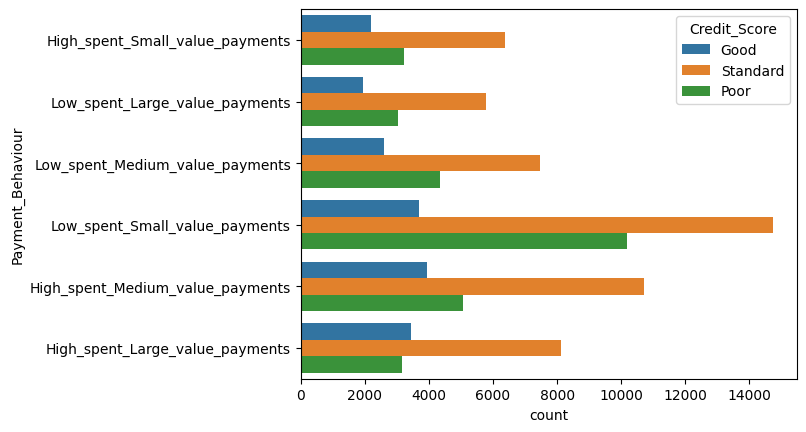

In [19]:
sns.countplot(y='Payment_Behaviour', hue='Credit_Score', data=df)

[Text(0.5, 1.0, 'Credit score of different occupants based on their annual Income')]

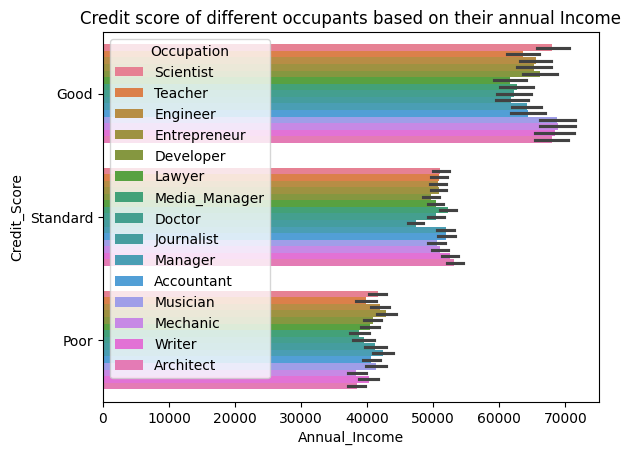

In [20]:
sns.barplot(x='Annual_Income', y='Credit_Score', hue='Occupation', data=df).set(title='Credit score of different occupants based on their annual Income')

[Text(0.5, 1.0, 'Credit Score based on Monthly Inhand Salary')]

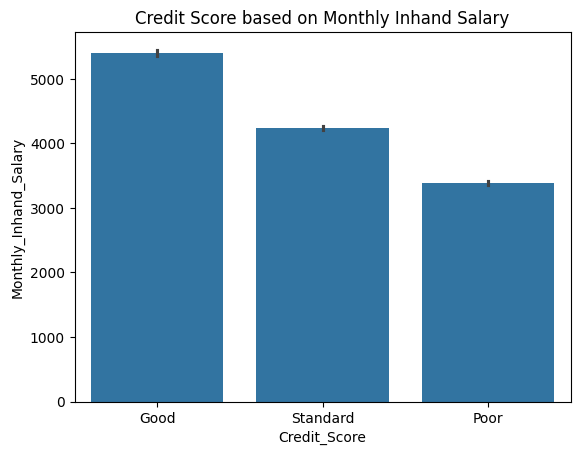

In [21]:
sns.barplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df).set(title='Credit Score based on Monthly Inhand Salary')

[Text(0.5, 1.0, 'Credit Score based on Num of Bank Accounts')]

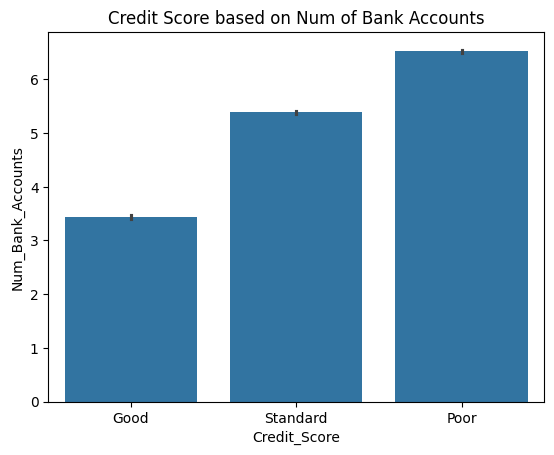

In [22]:
sns.barplot(x='Credit_Score', y='Num_Bank_Accounts', data=df).set(title='Credit Score based on Num of Bank Accounts')

[Text(0.5, 1.0, 'Credit Score based on Num of Credit Cards')]

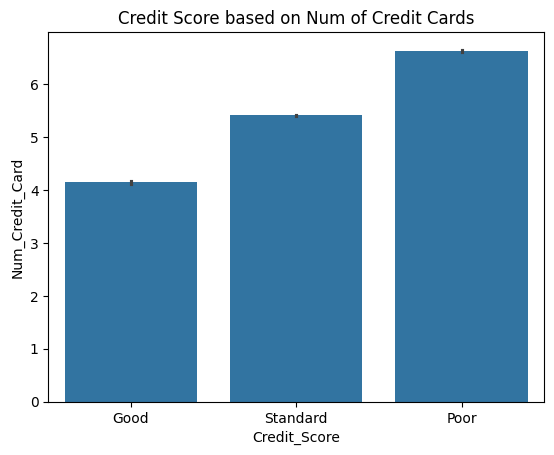

In [23]:
sns.barplot(x='Credit_Score', y='Num_Credit_Card', data=df).set(title='Credit Score based on Num of Credit Cards')

[Text(0.5, 1.0, 'Credit Score based on Interest_Rate')]

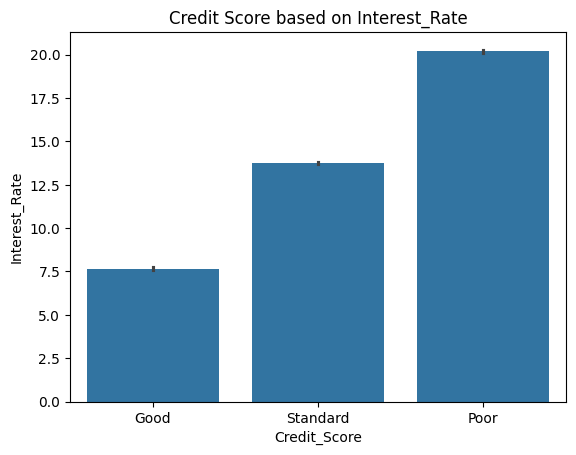

In [24]:
sns.barplot(x='Credit_Score', y='Interest_Rate', data=df).set(title='Credit Score based on Interest_Rate')

[Text(0.5, 1.0, 'Credit Score based on Number of Loan')]

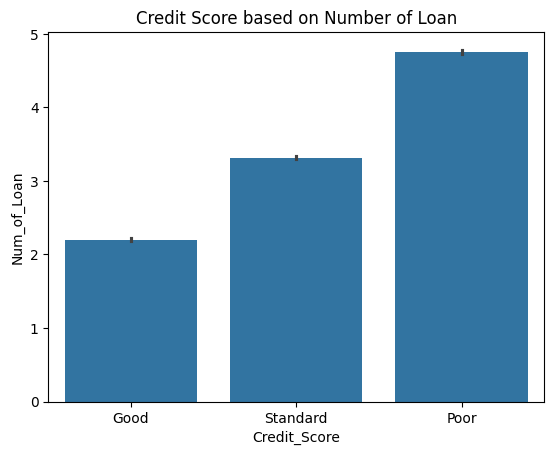

In [25]:
sns.barplot(x='Credit_Score', y='Num_of_Loan', data=df).set(title='Credit Score based on Number of Loan')

[Text(0.5, 1.0, 'Credit Score based on Delay_from_due_date')]

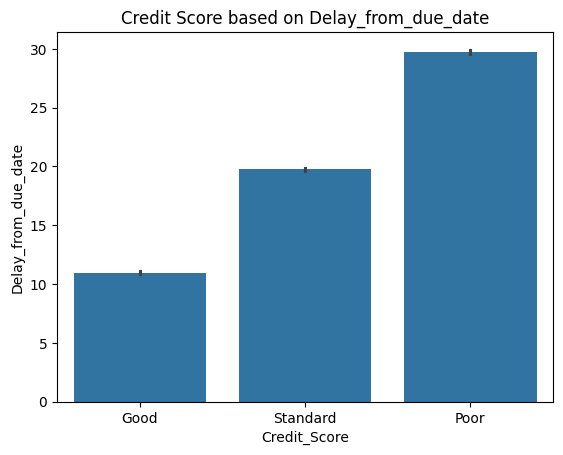

In [26]:
sns.barplot(x='Credit_Score', y='Delay_from_due_date', data=df).set(title='Credit Score based on Delay_from_due_date')

[Text(0.5, 1.0, 'Credit Score based on Num_of_Delayed_Payment')]

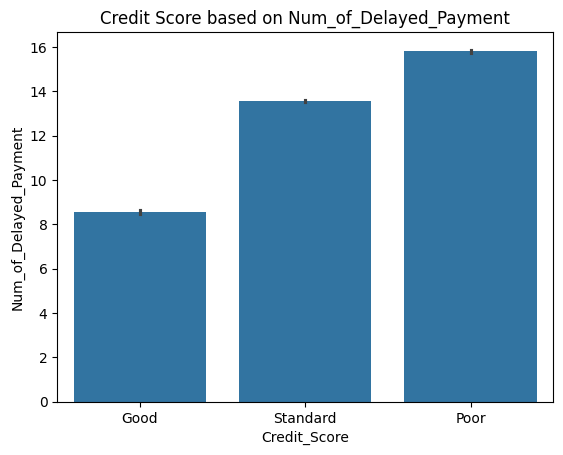

In [27]:
sns.barplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df).set(title='Credit Score based on Num_of_Delayed_Payment')

[Text(0.5, 1.0, 'Credit Score based on Changed_Credit_Limit')]

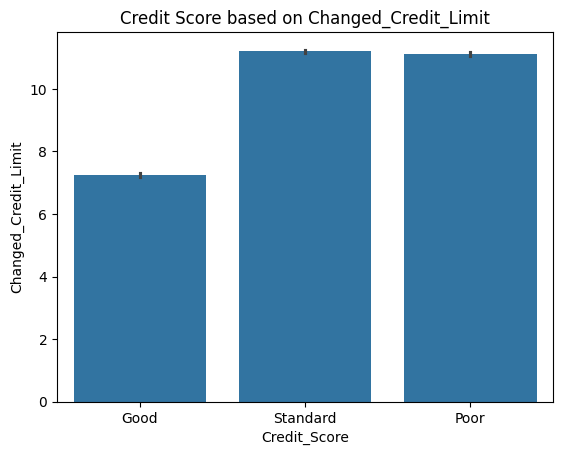

In [28]:
sns.barplot(x='Credit_Score', y='Changed_Credit_Limit', data=df).set(title='Credit Score based on Changed_Credit_Limit')

[Text(0.5, 1.0, 'Credit Score based on Number of Credit_Inquiries')]

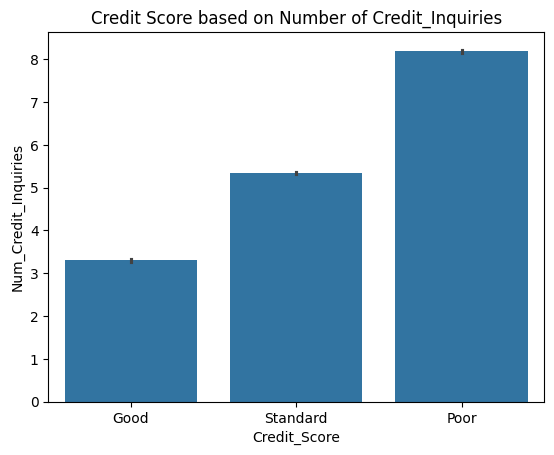

In [29]:
sns.barplot(x='Credit_Score', y='Num_Credit_Inquiries', data=df).set(title='Credit Score based on Number of Credit_Inquiries')

[Text(0.5, 1.0, 'Credit Score based on Outstanding_Debt')]

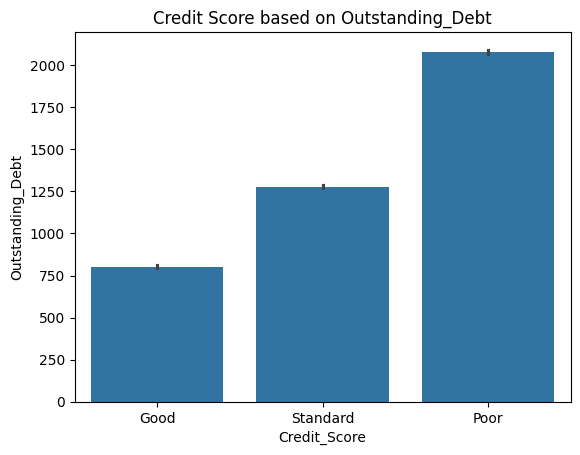

In [30]:
sns.barplot(x='Credit_Score', y='Outstanding_Debt', data=df).set(title='Credit Score based on Outstanding_Debt')

[Text(0.5, 1.0, 'Credit Score based on Credit_Utilization_Ratio')]

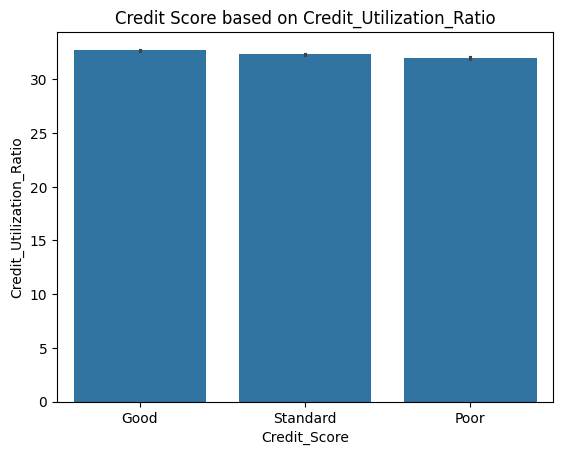

In [31]:
sns.barplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df).set(title='Credit Score based on Credit_Utilization_Ratio')

[Text(0.5, 1.0, 'Credit Score based on Credit_History_Age')]

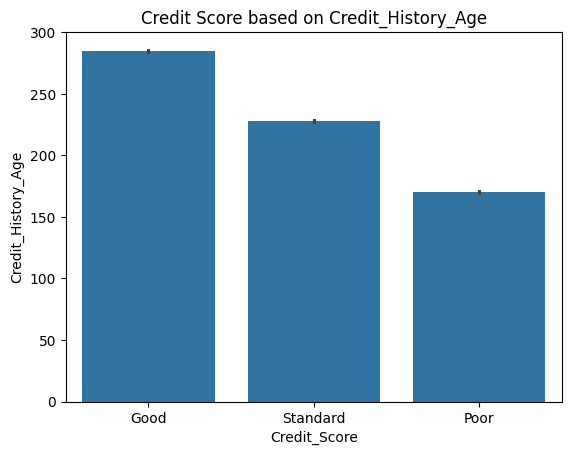

In [32]:
sns.barplot(x='Credit_Score', y='Credit_History_Age', data=df).set(title='Credit Score based on Credit_History_Age')

[Text(0.5, 1.0, 'Credit Score based on Total_EMI_per_month')]

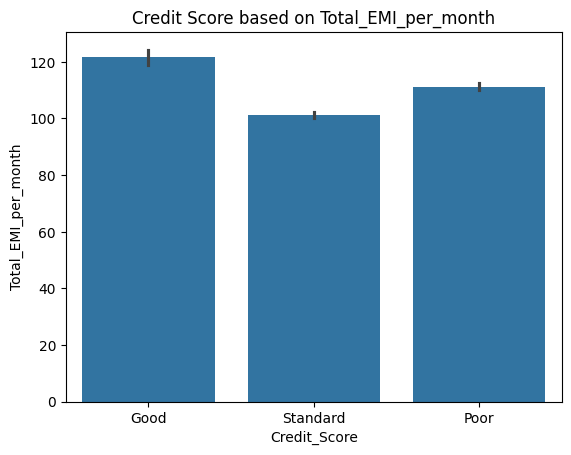

In [33]:
sns.barplot(x='Credit_Score', y='Total_EMI_per_month', data=df).set(title='Credit Score based on Total_EMI_per_month')

[Text(0.5, 1.0, 'Credit Score based on Amount_invested_monthly')]

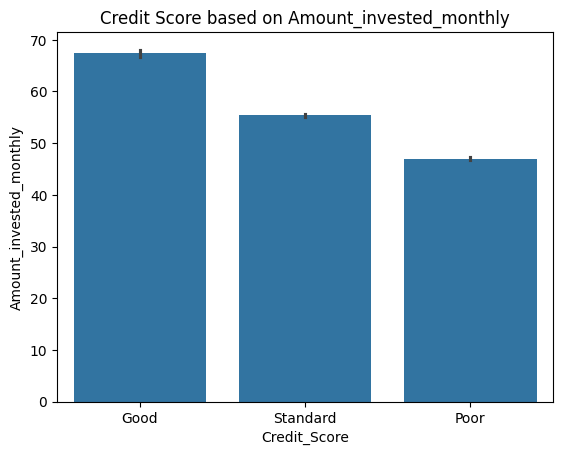

In [34]:
sns.barplot(x='Credit_Score', y='Amount_invested_monthly', data=df).set(title='Credit Score based on Amount_invested_monthly')

[Text(0.5, 1.0, 'Credit Score based on Monthly_Balance')]

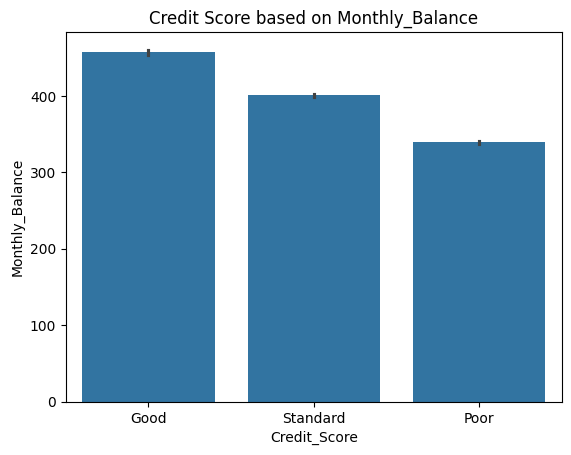

In [35]:
sns.barplot(x='Credit_Score', y='Monthly_Balance', data=df).set(title='Credit Score based on Monthly_Balance')

**Boxplots to see Outliers**

In [36]:
data=df.copy()

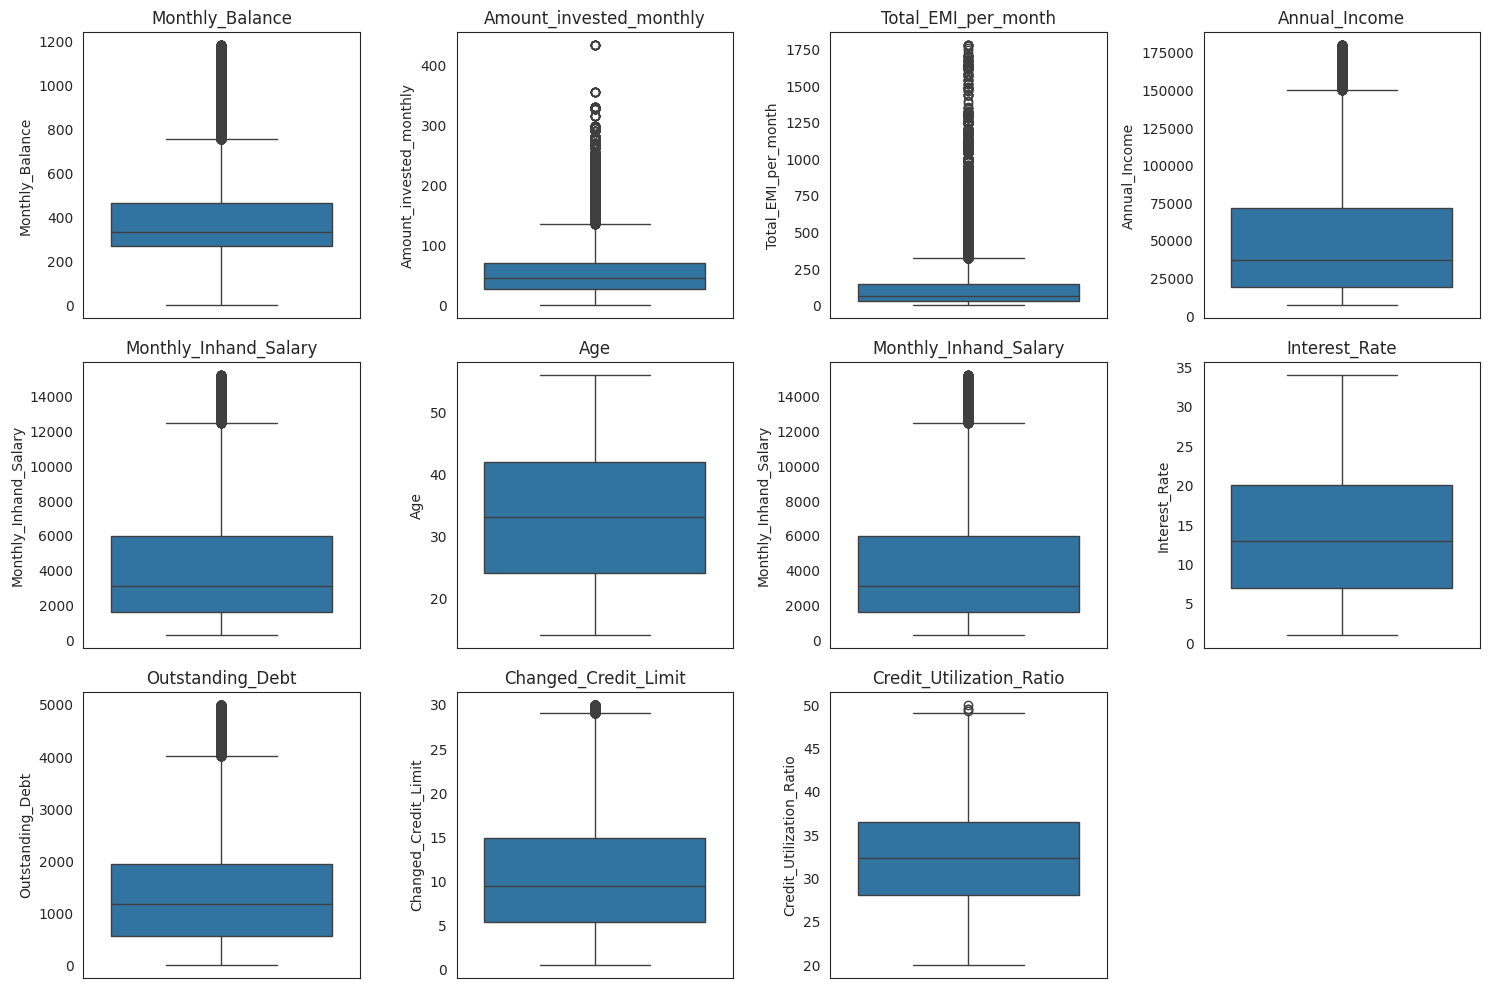

In [37]:
# Set seaborn style directly
sns.set_style("white")

# Creating the figure with specified size
plt.figure(figsize=(15, 10))

# First subplot
ax1 = plt.subplot(341)
sns.boxplot(y=data['Monthly_Balance'], ax=ax1)
ax1.set_title('Monthly_Balance')

# Second subplot
ax2 = plt.subplot(342)
sns.boxplot(y=data['Amount_invested_monthly'], ax=ax2)
ax2.set_title('Amount_invested_monthly')

# Third subplot
ax3 = plt.subplot(343)
sns.boxplot(y=data['Total_EMI_per_month'], ax=ax3)
ax3.set_title('Total_EMI_per_month')

ax4 = plt.subplot(344)
sns.boxplot(y=data['Annual_Income'], ax=ax4)
ax4.set_title('Annual_Income')

ax5 = plt.subplot(345)
sns.boxplot(y=data['Monthly_Inhand_Salary'], ax=ax5)
ax5.set_title('Monthly_Inhand_Salary')

ax6 = plt.subplot(346)
sns.boxplot(y=data['Age'], ax=ax6)
ax6.set_title('Age')

ax7 = plt.subplot(347)
sns.boxplot(y=data['Monthly_Inhand_Salary'], ax=ax7)
ax7.set_title('Monthly_Inhand_Salary')

ax8 = plt.subplot(348)
sns.boxplot(y=data['Interest_Rate'], ax=ax8)
ax8.set_title('Interest_Rate')

ax9 = plt.subplot(349)
sns.boxplot(y=data['Outstanding_Debt'], ax=ax9)
ax9.set_title('Outstanding_Debt')

ax10 = plt.subplot(3,4,10)
sns.boxplot(y=data['Changed_Credit_Limit'], ax=ax10)
ax10.set_title('Changed_Credit_Limit')

ax11 = plt.subplot(3,4,11)
sns.boxplot(y=data['Credit_Utilization_Ratio'], ax=ax11)
ax11.set_title('Credit_Utilization_Ratio')


plt.tight_layout()
plt.show()

**OUTLIER CAPPING - Monthly_Balance, Amount_invested_monthly, Total_EMI_per_month, Annual_Income, Monthly_Inhand_Salary have significant outliers. Let's fix that by IQR**

In [38]:
numerical_features=['Monthly_Balance','Amount_invested_monthly','Total_EMI_per_month', 'Annual_Income', 'Monthly_Inhand_Salary','Outstanding_Debt']
for cols in numerical_features:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (data[cols] >= Q1 - 1.5 * IQR) & (data[cols] <= Q3 + 1.5 *IQR)
    data=data.loc[filter]

In [39]:
data['Monthly_Balance'].max()

756.4625434314671

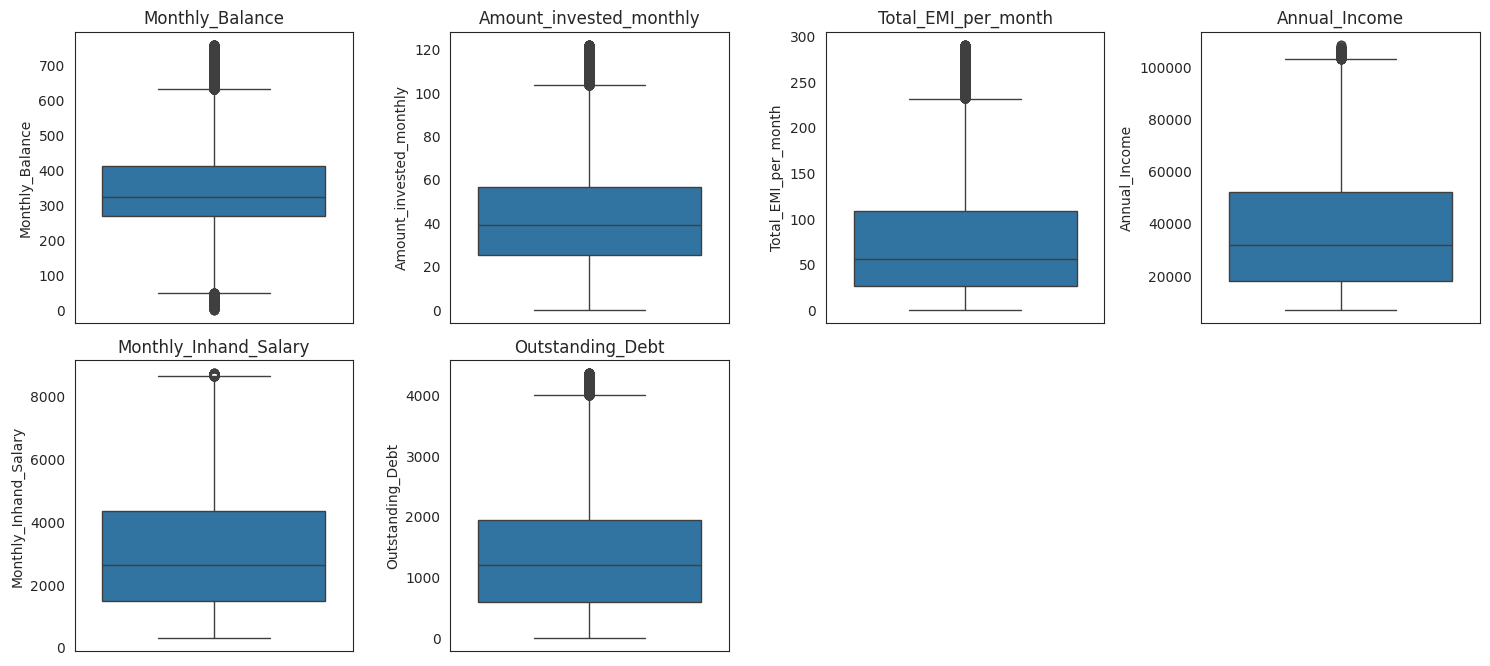

In [40]:
# Set seaborn style directly
sns.set_style("white")

# Creating the figure with specified size
plt.figure(figsize=(15, 10))

# First subplot
ax1 = plt.subplot(341)
sns.boxplot(y=data['Monthly_Balance'], ax=ax1)
ax1.set_title('Monthly_Balance')

# Second subplot
ax2 = plt.subplot(342)
sns.boxplot(y=data['Amount_invested_monthly'], ax=ax2)
ax2.set_title('Amount_invested_monthly')

# Third subplot
ax3 = plt.subplot(343)
sns.boxplot(y=data['Total_EMI_per_month'], ax=ax3)
ax3.set_title('Total_EMI_per_month')

ax4 = plt.subplot(344)
sns.boxplot(y=data['Annual_Income'], ax=ax4)
ax4.set_title('Annual_Income')

ax5 = plt.subplot(345)
sns.boxplot(y=data['Monthly_Inhand_Salary'], ax=ax5)
ax5.set_title('Monthly_Inhand_Salary')

ax6 = plt.subplot(346)
sns.boxplot(y=data['Outstanding_Debt'], ax=ax6)
ax6.set_title('Outstanding_Debt')


# Display the plots
plt.tight_layout()
plt.show()

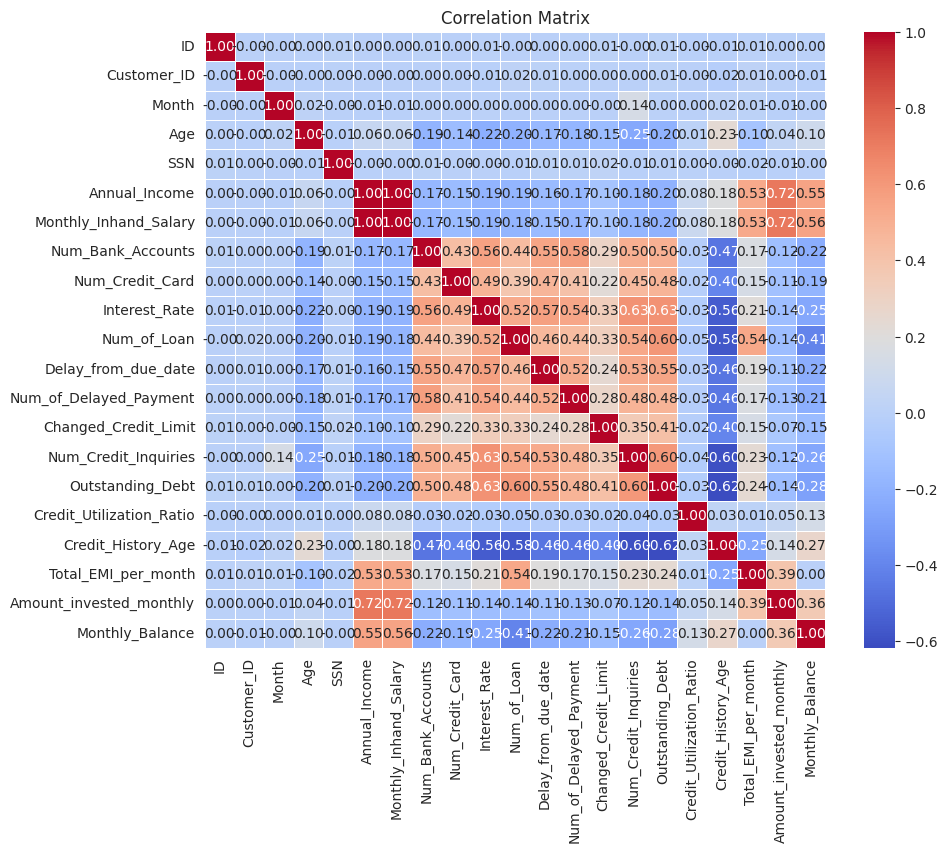

In [41]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix on the numeric data
corr_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Use seaborn's heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

**ENCODING**

In [42]:
# Dropping columns that are not useful for clustering
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan']
data_cleaned = data.drop(columns=columns_to_drop)

#ordinal encoding using map
data['Credit_Mix'] = data['Credit_Mix'].map({'Good':2, 'Standard':1, 'Bad':0})
data['Credit_Score'] = data['Credit_Score'].map({'Good':2, 'Standard':1, 'Poor':0})
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map({'No': 0, 'NM': 1, 'Yes': 2})

# One-Hot Encoding for 'Occupation' and 'Payment_Behaviour'
data = pd.get_dummies(data, columns=['Occupation'], prefix='Occ')
data = pd.get_dummies(data, columns=['Payment_Behaviour'], prefix='PayBehaviour')


#Display the first few rows of the updated dataset
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Writer,PayBehaviour_High_spent_Large_value_payments,PayBehaviour_High_spent_Medium_value_payments,PayBehaviour_High_spent_Small_value_payments,PayBehaviour_Low_spent_Large_value_payments,PayBehaviour_Low_spent_Medium_value_payments,PayBehaviour_Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,False,True,False,False,False,False,True,False,False,False
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,False,True,False,False,False,False,False,True,False,False
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,False,True,False,False,False,False,False,False,True,False
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,False,True,False,False,False,False,False,False,False,True
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,False,True,False,False,False,True,False,False,False,False


In [43]:
data['Credit_Score'].unique()

array([2, 1, 0])

*Finally, all the features in the data are now numerical.*

**# Scaling Numerical Columns**

Standardization ensures that all features contribute equally to the clustering process, regardless of their original scales.

In [44]:
from sklearn.preprocessing import StandardScaler

# Normalizing numerical features
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                     'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                     'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                     'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the preprocessed data
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Writer,PayBehaviour_High_spent_Large_value_payments,PayBehaviour_High_spent_Medium_value_payments,PayBehaviour_High_spent_Small_value_payments,PayBehaviour_Low_spent_Large_value_payments,PayBehaviour_Low_spent_Medium_value_payments,PayBehaviour_Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,-0.947722,821000265.0,-0.761027,-0.639026,-0.979629,-0.769013,...,False,True,False,False,False,False,True,False,False,False
1,5635,3392,2,Aaron Maashoh,-0.947722,821000265.0,-0.761027,-0.639026,-0.979629,-0.769013,...,False,True,False,False,False,False,False,True,False,False
2,5636,3392,3,Aaron Maashoh,-0.947722,821000265.0,-0.761027,-0.639026,-0.979629,-0.769013,...,False,True,False,False,False,False,False,False,True,False
3,5637,3392,4,Aaron Maashoh,-0.947722,821000265.0,-0.761027,-0.639026,-0.979629,-0.769013,...,False,True,False,False,False,False,False,False,False,True
4,5638,3392,5,Aaron Maashoh,-0.947722,821000265.0,-0.761027,-0.639026,-0.979629,-0.769013,...,False,True,False,False,False,True,False,False,False,False


Feature reduction

Currently, the data contains several independent features, and they may all be useless for modeling as they may have a weak relationship with the target variable. Therefore, we will remove unwanted features and select the important ones.
We start by dropping columns irrelevant to building a credit-scoring model.

In [45]:
data.drop(['ID', 'Customer_ID', 'SSN', 'Name','Type_of_Loan'], axis=1, inplace=True)
data

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Writer,PayBehaviour_High_spent_Large_value_payments,PayBehaviour_High_spent_Medium_value_payments,PayBehaviour_High_spent_Small_value_payments,PayBehaviour_Low_spent_Large_value_payments,PayBehaviour_Low_spent_Medium_value_payments,PayBehaviour_Low_spent_Small_value_payments
0,1,-0.947722,-0.761027,-0.639026,-0.979629,-0.769013,-1.365366,0.199139,-1.249982,-1.085802,...,False,True,False,False,False,False,True,False,False,False
1,2,-0.947722,-0.761027,-0.639026,-0.979629,-0.769013,-1.365366,0.199139,-1.249982,-1.580928,...,False,True,False,False,False,False,False,True,False,False
2,3,-0.947722,-0.761027,-0.639026,-0.979629,-0.769013,-1.365366,0.199139,-1.249982,-1.085802,...,False,True,False,False,False,False,False,False,True,False
3,4,-0.947722,-0.761027,-0.639026,-0.979629,-0.769013,-1.365366,0.199139,-1.114023,-1.580928,...,False,True,False,False,False,False,False,False,False,True
4,5,-0.947722,-0.761027,-0.639026,-0.979629,-0.769013,-1.365366,0.199139,-1.046044,-1.580928,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,-0.761478,0.116371,0.147313,-0.585563,0.205197,-0.906881,-0.655404,0.109607,-1.085802,...,False,False,False,False,True,False,False,False,False,False
99996,5,-0.761478,0.116371,0.147313,-0.585563,0.205197,-0.906881,-0.655404,-0.230290,-1.085802,...,False,False,False,False,False,True,False,False,False,False
99997,6,-0.761478,0.116371,0.147313,-0.585563,0.205197,-0.906881,-0.655404,0.381525,-1.250844,...,False,False,False,False,True,False,False,False,False,False
99998,7,-0.761478,0.116371,0.147313,-0.585563,0.205197,-0.906881,-0.655404,-0.094331,-1.250844,...,False,False,False,False,False,False,False,True,False,False


**1. CUSTOMER SEGMENTATION(CLUSTERING)**

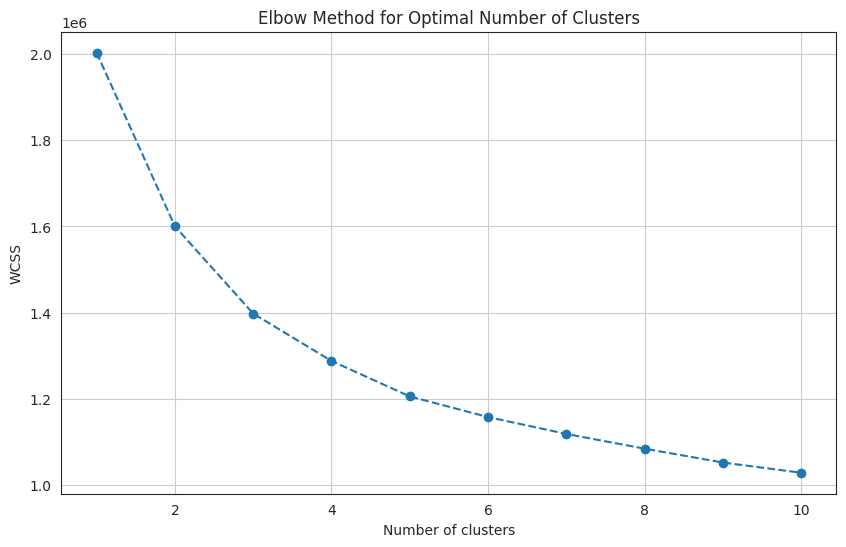

In [46]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Initialize an empty dictionary to store the results
results = {}

# Loop through each number of clusters
for n_clusters in [2, 3, 4, 5]:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data)  # Using a subset of 5,000 samples

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)

    # Calculate the Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data, cluster_labels)

    # Calculate the Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)

    # Store the results
    results[n_clusters] = {
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    }

# Print the results
for n_clusters, metrics in results.items():
    print(f"Number of Clusters: {n_clusters}")
    print(f"  Silhouette Score: {metrics['Silhouette Score']}")
    print(f"  Davies-Bouldin Index: {metrics['Davies-Bouldin Index']}")
    print(f"  Calinski-Harabasz Index: {metrics['Calinski-Harabasz Index']}")
    print("\n")


Number of Clusters: 2
  Silhouette Score: 0.1838483691957981
  Davies-Bouldin Index: 1.9365097076158493
  Calinski-Harabasz Index: 19573.548876526085


Number of Clusters: 3
  Silhouette Score: 0.15884846493775473
  Davies-Bouldin Index: 1.8675294199880093
  Calinski-Harabasz Index: 16828.598056629555


Number of Clusters: 4
  Silhouette Score: 0.14065325255873748
  Davies-Bouldin Index: 2.0043953006843758
  Calinski-Harabasz Index: 14386.750329637302


Number of Clusters: 5
  Silhouette Score: 0.13747747481777325
  Davies-Bouldin Index: 1.9256531505082415
  Calinski-Harabasz Index: 12851.470126662714




Based on the typical interpretation of clustering validation metrics:

Silhouette Score: Higher values indicate better-defined clusters. This score reflects how similar a data point is to its own cluster compared to other clusters.

Davies-Bouldin Index: Lower values indicate better clustering quality. This index measures the average similarity ratio of each cluster with its most similar cluster.

Calinski-Harabasz Index: Higher values indicate better-defined clusters. This index measures the ratio of the sum of between-cluster dispersion and within-cluster dispersion.

In short, looking for:

The highest Silhouette Score.
The lowest Davies-Bouldin Index.
The highest Calinski-Harabasz Index.

In [48]:
# Apply KMeans clustering with the optimal number of clusters determined from the elbow method (k=2)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Display the first few rows with the cluster labels
data[['Annual_Income', 'Cluster']].head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Annual_Income,Cluster
0,-0.761027,0
1,-0.761027,0
2,-0.761027,0
3,-0.761027,0
4,-0.761027,0


*The scatter plot shows the distribution of customers across the first two principal components, colored by their assigned clusters. However, to gain deeper insights into these customer segments, we need to analyze the characteristics of each cluster in terms of the original features.*

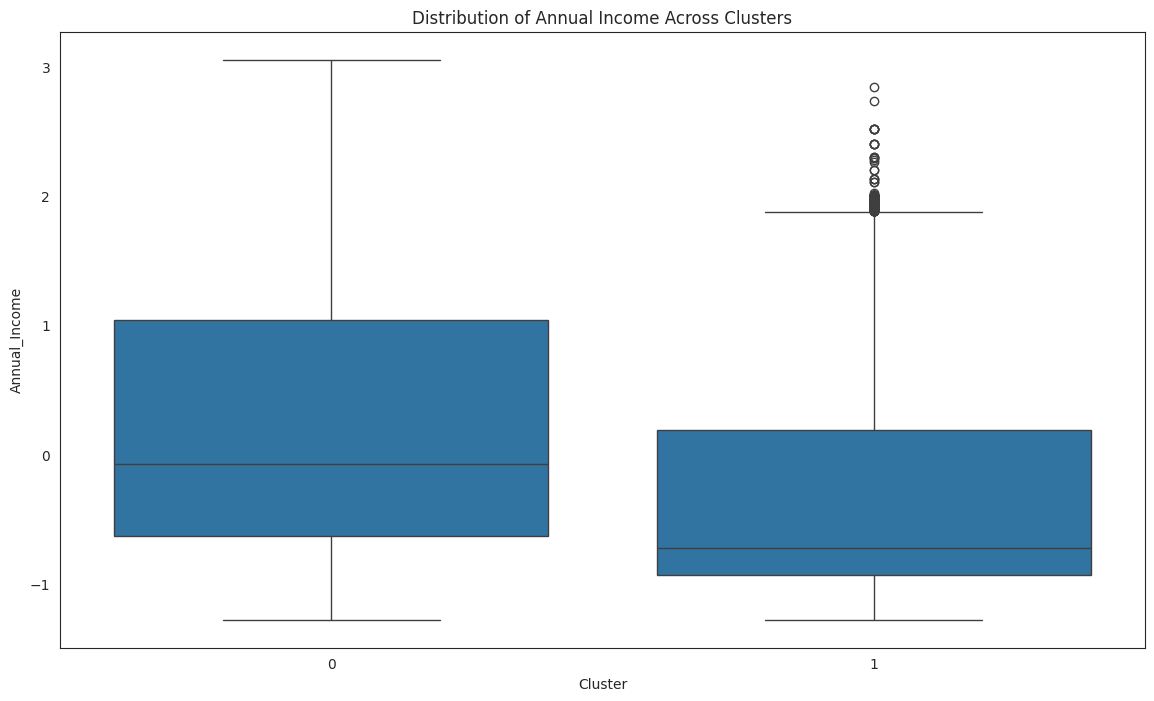

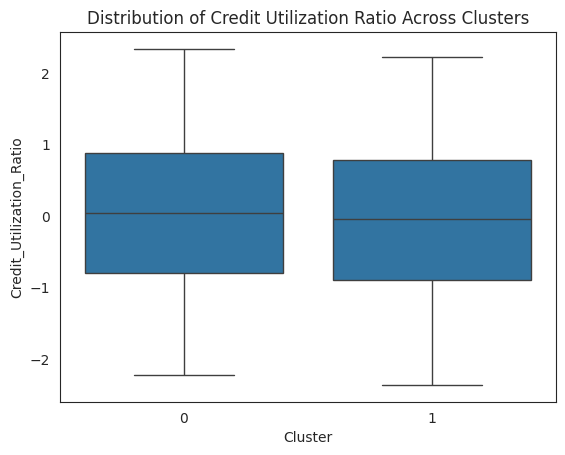

In [49]:
import seaborn as sns

# For each cluster, plot a box plot for key features
plt.figure(figsize=(14, 8))
sns.boxplot(x='Cluster', y='Annual_Income', data=data)
plt.title('Distribution of Annual Income Across Clusters')
plt.show()

sns.boxplot(x='Cluster', y='Credit_Utilization_Ratio', data=data)
plt.title('Distribution of Credit Utilization Ratio Across Clusters')
plt.show()


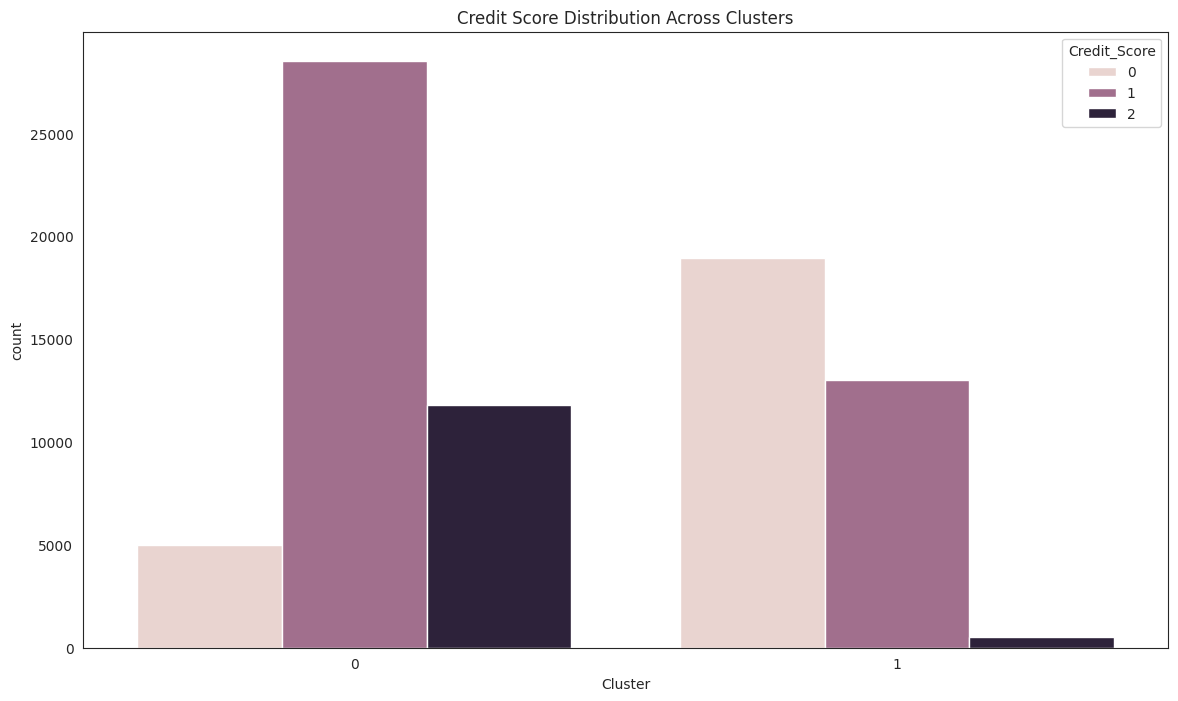

In [50]:
# Plot the count of a categorical feature within each cluster
plt.figure(figsize=(14, 8))
sns.countplot(x='Cluster', hue='Credit_Score', data=data)
plt.title('Credit Score Distribution Across Clusters')
plt.show()

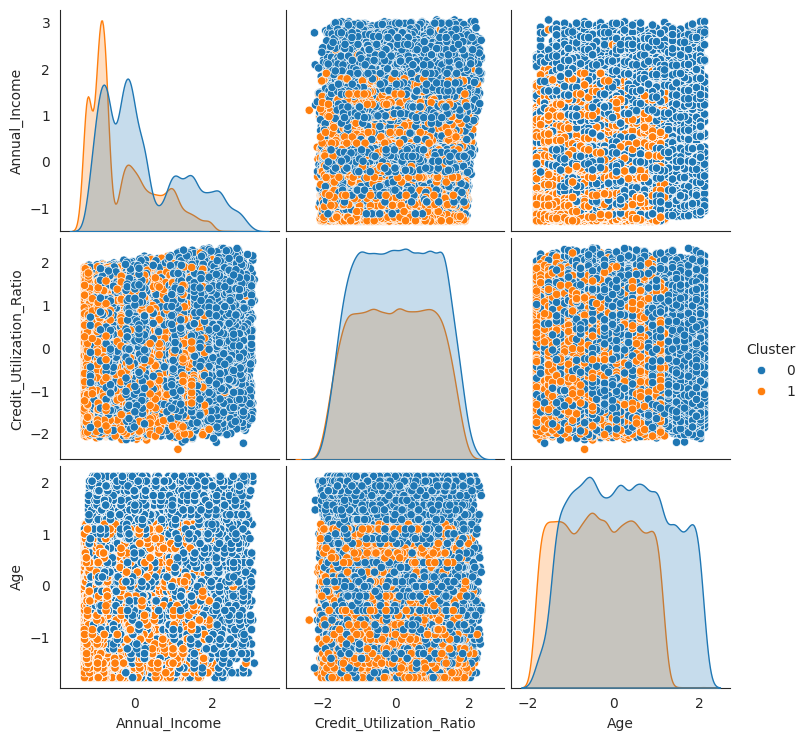

In [51]:
sns.pairplot(data[['Annual_Income', 'Credit_Utilization_Ratio', 'Age', 'Cluster']], hue='Cluster')
plt.show()

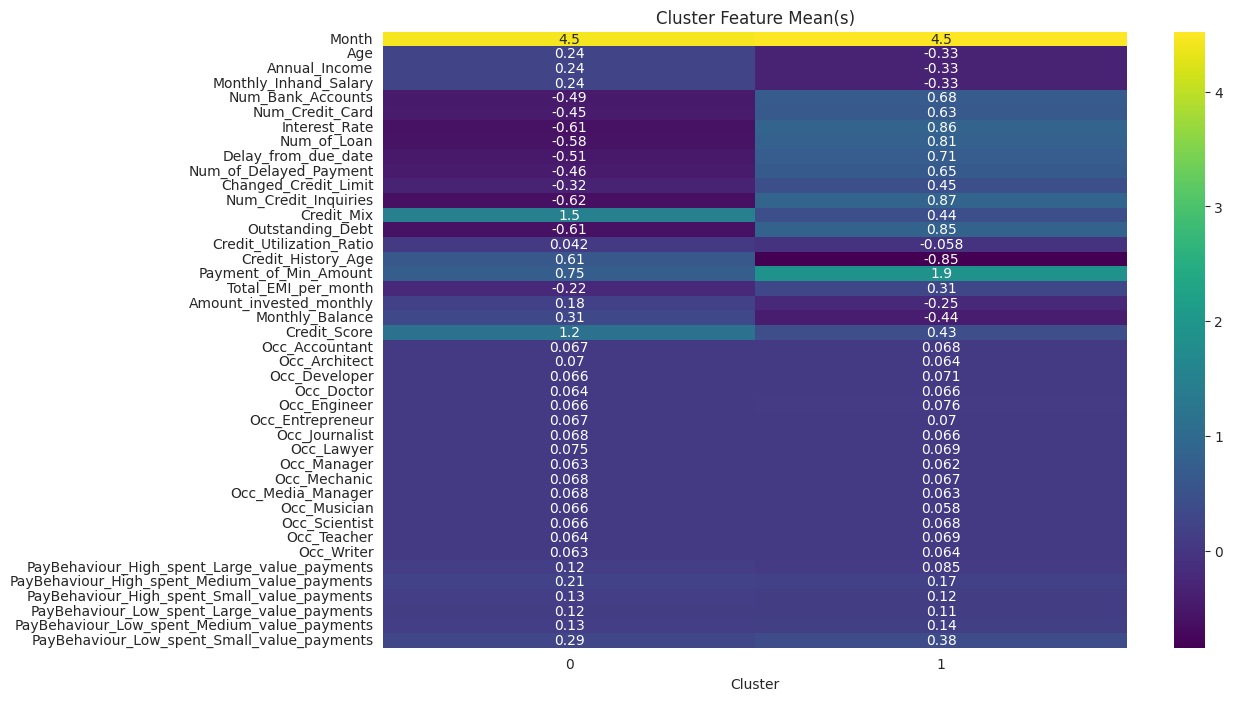

In [52]:
cluster_means = data.groupby('Cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True)
plt.title('Cluster Feature Mean(s)')
plt.show()

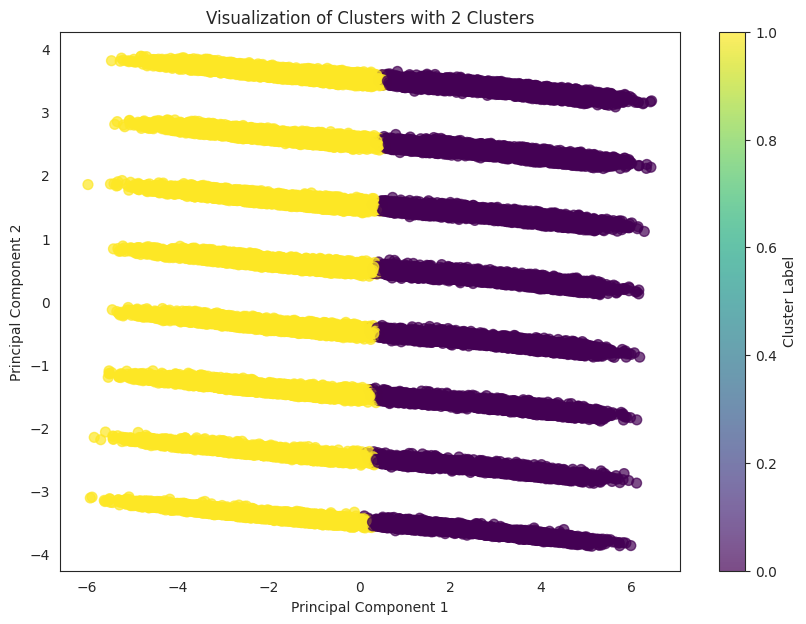

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
# Step 2: Apply K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Step 3: Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Visualization of Clusters with 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


*The scatter plot shows the distribution of customers across the first two principal components, colored by their assigned clusters. However, to gain deeper insights into these customer segments, we need to analyze the characteristics of each cluster in terms of the original features.*

In [54]:
# Group the data by clusters and calculate the mean of each feature within each cluster
cluster_profiles = data.groupby('Cluster').mean()

# Display the profiles of each cluster
print("Cluster Profiles:")
print(cluster_profiles)

# Optionally, if you want to focus on a few top features for each cluster:
top_features = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']

print("\nTop Features for Each Cluster:")
print(cluster_profiles[top_features])



Cluster Profiles:
            Month       Age  Annual_Income  Monthly_Inhand_Salary  \
Cluster                                                             
0        4.451435  0.238668       0.239457               0.238622   
1        4.522900 -0.333005      -0.334105              -0.332940   

         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Cluster                                                                   
0                -0.488490        -0.451728      -0.614455    -0.577957   
1                 0.681572         0.630279       0.857326     0.806403   

         Delay_from_due_date  Num_of_Delayed_Payment  ...  Occ_Musician  \
Cluster                                               ...                 
0                  -0.506057               -0.463718  ...      0.065629   
1                   0.706083                0.647009  ...      0.058059   

         Occ_Scientist  Occ_Teacher  Occ_Writer  \
Cluster                                           
0

To summarise:

Cluster 1 - represent customers who are financially stable, make timely payments, and have a good credit history.

Cluster 0 - represent customers who are more likely to delay payments, have higher outstanding debt, and may be at higher risk

**2. CREDIT RISK ASSESSMENT(CLASSIFICATION)**

In [221]:
# importing key libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif

# extracting the predictor variables
X = data.drop(['Credit_Score', 'Cluster'], axis=1)

# extracting the target variable
y = data['Credit_Score']

# Method 1: finding feature importance using Tree-Based method
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_
top_10_rf = X.columns[feature_importances.argsort()[-10:][::-1]]

print("Top 10 variables from Tree-Based Method:", ', '.join(top_10_rf))
print("---------------------------------------------------------------------------------------------------------")

# # Method 2: using Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector.fit(X, y)
top_10_rfe = X.columns[rfe_selector.support_]

print("Top 10 variables from Method Recursive Feature Elimination:", ', '.join(top_10_rfe))
print("---------------------------------------------------------------------------------------------------------")

# Method 3: using Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
top_10_univariate = X.columns[selector.get_support()]

print("Top 10 variables from Univariate Feature Selection:", ', '.join(top_10_univariate))

Top 10 variables from Tree-Based Method: Outstanding_Debt, Interest_Rate, Credit_Mix, Credit_History_Age, Delay_from_due_date, Changed_Credit_Limit, Estimated_Interest_Income, Monthly_Balance, Num_Credit_Card, Credit_Utilization_Ratio
---------------------------------------------------------------------------------------------------------
Top 10 variables from Method Recursive Feature Elimination: Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Monthly_Balance, Estimated_Interest_Income
---------------------------------------------------------------------------------------------------------
Top 10 variables from Univariate Feature Selection: Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_History_Age, Payment_of_Min_Amount


*We find the important columns by picking only those that appear in at least one of the feature selection method’s outputs.*

In [222]:
imp_columns = list(set(top_10_rf.tolist() + top_10_rfe.tolist() + top_10_univariate.tolist()))
imp_columns
print('Number of selected columns are: ', len(imp_columns))

Number of selected columns are:  15


In [223]:
imp_columns

['Num_Bank_Accounts',
 'Num_Credit_Card',
 'Credit_History_Age',
 'Annual_Income',
 'Credit_Utilization_Ratio',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Payment_of_Min_Amount',
 'Credit_Mix',
 'Estimated_Interest_Income',
 'Monthly_Balance',
 'Outstanding_Debt',
 'Changed_Credit_Limit',
 'Num_of_Delayed_Payment',
 'Interest_Rate']

*Checking multicollinearity*

*Correlation matrix: We use correlation to check for multicollinearity and mark the columns where the absolute correlation value is above 0.7*

In [224]:
# extracting the selected independent features
X_selected = data[imp_columns]

# creating correlation matrix
correlation_matrix = X_selected.corr()

# finding highly correlated feature pairs
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)

print("Highly correlated pairs of variables and their correlation values:\n")
checked_pairs = set() # To keep track of checked pairs
for col1 in X_selected.columns:
    for col2 in X_selected.columns:
        if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
            if highly_correlated_pairs.loc[col1, col2]:
                correlation_value = correlation_matrix.loc[col1, col2]
                print(f"{col1} - {col2}: {correlation_value:.2f}")
                checked_pairs.add((col1, col2))



Highly correlated pairs of variables and their correlation values:

Num_Bank_Accounts - Credit_Mix: -0.70
Credit_Mix - Num_of_Delayed_Payment: -0.74
Credit_Mix - Interest_Rate: -0.73


*We now remove the correlated columns.*

In [225]:
columns_to_remove = ['Credit_Mix', 'Annual_Income']
X_reduced = X_selected.drop(columns=columns_to_remove)
X_reduced

,Num_Bank_Accounts,Num_Credit_Card,Credit_History_Age,Credit_Utilization_Ratio,Delay_from_due_date,Num_Credit_Inquiries,Payment_of_Min_Amount,Estimated_Interest_Income,Monthly_Balance,Outstanding_Debt,Changed_Credit_Limit,Num_of_Delayed_Payment,Interest_Rate
0,-0.979629,-0.769013,0.470802,-1.028587,-1.249982,-0.506029,0,0.763499,-0.278515,-0.559190,0.126631,-1.085802,-1.365366
1,-0.979629,-0.769013,0.481008,-0.001907,-1.249982,-0.506029,0,0.763499,-0.495478,-0.559190,0.126631,-1.580928,-1.365366
2,-0.979629,-0.769013,0.491214,-0.670469,-1.249982,-0.506029,0,0.763499,-0.132790,-0.559190,0.126631,-1.085802,-1.365366
3,-0.979629,-0.769013,0.501419,-0.115572,-1.114023,-0.506029,0,0.763499,-0.971822,-0.559190,-0.652407,-1.580928,-1.365366
4,-0.979629,-0.769013,0.511625,-1.434516,-1.046044,-0.506029,0,0.763499,-0.052753,-0.559190,0.126631,-1.580928,-1.365366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.585563,0.205197,1.624050,0.542989,0.109607,-0.764435,0,0.782989,1.024681,-0.863387,0.162466,-1.085802,-0.906881
99996,-0.585563,0.205197,1.634256,1.725949,-0.230290,-0.764435,0,0.782989,1.155376,-0.863387,0.162466,-1.085802,-0.906881
99997,-0.585563,0.205197,1.644462,1.864225,0.381525,-0.764435,0,0.782989,1.312326,-0.863387,0.162466,-1.250844,-0.906881
99998,-0.585563,0.205197,1.654667,0.337473,-0.094331,-0.764435,0,0.782989,-0.226574,-0.863387,0.162466,-1.250844,-0.906881


*Variance inflation factor (VIF): To eliminate multicollinearity, we will calculate the VIF value for each independent feature.*

In [226]:
# calculating vif ofthe selected features
vif_df = pd.DataFrame()
vif_df["Variable"] = X_reduced.columns
vif_df["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
print("Variance Inflation Factors:")
print(vif_df)

Variance Inflation Factors:
                     Variable       VIF
0           Num_Bank_Accounts  1.922835
1             Num_Credit_Card  1.510755
2          Credit_History_Age  2.010914
3    Credit_Utilization_Ratio  1.017995
4         Delay_from_due_date  1.904789
5        Num_Credit_Inquiries  2.179305
6       Payment_of_Min_Amount  1.567138
7   Estimated_Interest_Income  1.559075
8             Monthly_Balance  1.133988
9            Outstanding_Debt  2.602609
10       Changed_Credit_Limit  1.295547
11     Num_of_Delayed_Payment  1.815131
12              Interest_Rate  2.349572


In [227]:
print('Number of selected columns are: ', len(X_reduced.columns))


Number of selected columns are:  13


In [228]:
final_X_cols = X_reduced.columns.tolist()
print("Final selected predictors are: ", ', '.join(final_X_cols))

Final selected predictors are:  Num_Bank_Accounts, Num_Credit_Card, Credit_History_Age, Credit_Utilization_Ratio, Delay_from_due_date, Num_Credit_Inquiries, Payment_of_Min_Amount, Estimated_Interest_Income, Monthly_Balance, Outstanding_Debt, Changed_Credit_Limit, Num_of_Delayed_Payment, Interest_Rate


*We now create the final dataset for modeling with the 13 selected independent features and the target (dependent) variable.*

In [229]:
data_final = data[final_X_cols + ['Credit_Score']]
data_final

,Num_Bank_Accounts,Num_Credit_Card,Credit_History_Age,Credit_Utilization_Ratio,Delay_from_due_date,Num_Credit_Inquiries,Payment_of_Min_Amount,Estimated_Interest_Income,Monthly_Balance,Outstanding_Debt,Changed_Credit_Limit,Num_of_Delayed_Payment,Interest_Rate,Credit_Score
0,-0.979629,-0.769013,0.470802,-1.028587,-1.249982,-0.506029,0,0.763499,-0.278515,-0.559190,0.126631,-1.085802,-1.365366,2
1,-0.979629,-0.769013,0.481008,-0.001907,-1.249982,-0.506029,0,0.763499,-0.495478,-0.559190,0.126631,-1.580928,-1.365366,2
2,-0.979629,-0.769013,0.491214,-0.670469,-1.249982,-0.506029,0,0.763499,-0.132790,-0.559190,0.126631,-1.085802,-1.365366,2
3,-0.979629,-0.769013,0.501419,-0.115572,-1.114023,-0.506029,0,0.763499,-0.971822,-0.559190,-0.652407,-1.580928,-1.365366,2
4,-0.979629,-0.769013,0.511625,-1.434516,-1.046044,-0.506029,0,0.763499,-0.052753,-0.559190,0.126631,-1.580928,-1.365366,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.585563,0.205197,1.624050,0.542989,0.109607,-0.764435,0,0.782989,1.024681,-0.863387,0.162466,-1.085802,-0.906881,0
99996,-0.585563,0.205197,1.634256,1.725949,-0.230290,-0.764435,0,0.782989,1.155376,-0.863387,0.162466,-1.085802,-0.906881,0
99997,-0.585563,0.205197,1.644462,1.864225,0.381525,-0.764435,0,0.782989,1.312326,-0.863387,0.162466,-1.250844,-0.906881,0
99998,-0.585563,0.205197,1.654667,0.337473,-0.094331,-0.764435,0,0.782989,-0.226574,-0.863387,0.162466,-1.250844,-0.906881,1


*Balancing data *

In [230]:
data['Credit_Score'].value_counts()

,count
Credit_Score,
1,41524
0,23937
2,12306


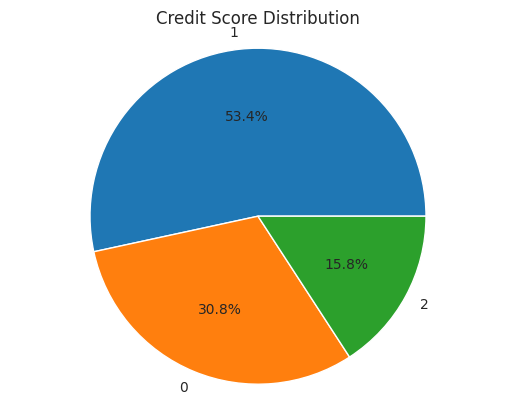

In [231]:
category_counts = data['Credit_Score'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Credit Score Distribution')
plt.show()

*We are dealing with class-imbalanced data, as evidenced by the number of categories in the target feature. *

**We used the SMOTE method, where synthetic samples are created for the minority classes to balance the classes.**

In [232]:
# initializing SMOTE
smote = SMOTE()
# fitting SMOTE to the data
X_bal, y_bal = smote.fit_resample(X, y)
y_bal.value_counts()

,count
Credit_Score,
2,41524
1,41524
0,41524


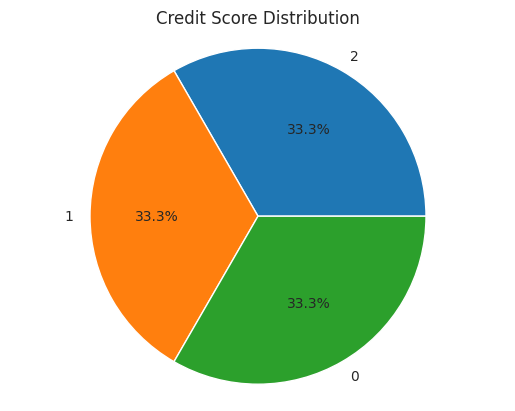

In [233]:
category_counts = y_bal.value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Credit Score Distribution')
plt.show()

In [234]:
len(X_bal)

124572

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(99657, 42)
(24915, 42)
(99657,)
(24915,)


In [239]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report \n', classification_report(y_test, y_pred))

Accuracy: 0.9002207505518763
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      8305
           1       0.91      0.81      0.85      8305
           2       0.92      0.96      0.94      8305

    accuracy                           0.90     24915
   macro avg       0.90      0.90      0.90     24915
weighted avg       0.90      0.90      0.90     24915



SMOTE Application: SMOTE is applied only on the training data to balance the classes. This means that the test set still retains its original class distribution, which can lead to unequal support numbers in the classification report.

Stratified Splitting: using stratify=y_resampled in the train_test_split function, the test set will have the same proportion of classes as the original dataset before applying SMOTE.



**Default Payment Prediction**

In [240]:
data_final['Credit_Score'].value_counts()

,count
Credit_Score,
1,41524
0,23937
2,12306


In [245]:
data_final = data_final.copy()  # Make sure it's a copy, not a view
data_final.loc[:, 'Default_Proxy'] = data_final['Credit_Score'].apply(lambda x: 0 if x in [0, 1] else 1)
data_final['Default_Proxy'] .value_counts()


,count
Default_Proxy,
0,65461
1,12306


In [246]:
data_final

,Num_Bank_Accounts,Num_Credit_Card,Credit_History_Age,Credit_Utilization_Ratio,Delay_from_due_date,Num_Credit_Inquiries,Payment_of_Min_Amount,Estimated_Interest_Income,Monthly_Balance,Outstanding_Debt,Changed_Credit_Limit,Num_of_Delayed_Payment,Interest_Rate,Credit_Score,Default_Proxy
0,-0.979629,-0.769013,0.470802,-1.028587,-1.249982,-0.506029,0,0.763499,-0.278515,-0.559190,0.126631,-1.085802,-1.365366,2,1
1,-0.979629,-0.769013,0.481008,-0.001907,-1.249982,-0.506029,0,0.763499,-0.495478,-0.559190,0.126631,-1.580928,-1.365366,2,1
2,-0.979629,-0.769013,0.491214,-0.670469,-1.249982,-0.506029,0,0.763499,-0.132790,-0.559190,0.126631,-1.085802,-1.365366,2,1
3,-0.979629,-0.769013,0.501419,-0.115572,-1.114023,-0.506029,0,0.763499,-0.971822,-0.559190,-0.652407,-1.580928,-1.365366,2,1
4,-0.979629,-0.769013,0.511625,-1.434516,-1.046044,-0.506029,0,0.763499,-0.052753,-0.559190,0.126631,-1.580928,-1.365366,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.585563,0.205197,1.624050,0.542989,0.109607,-0.764435,0,0.782989,1.024681,-0.863387,0.162466,-1.085802,-0.906881,0,0
99996,-0.585563,0.205197,1.634256,1.725949,-0.230290,-0.764435,0,0.782989,1.155376,-0.863387,0.162466,-1.085802,-0.906881,0,0
99997,-0.585563,0.205197,1.644462,1.864225,0.381525,-0.764435,0,0.782989,1.312326,-0.863387,0.162466,-1.250844,-0.906881,0,0
99998,-0.585563,0.205197,1.654667,0.337473,-0.094331,-0.764435,0,0.782989,-0.226574,-0.863387,0.162466,-1.250844,-0.906881,1,0


In [77]:
print(y.shape)  # Should return (number_of_rows,)


(77767,)


In [78]:
print(X.shape)  # Should return (number_of_rows, num of columns)


(77767, 42)


In [247]:
X = data_final.drop(['Credit_Score', 'Default_Proxy'], axis=1)
y = data_final['Default_Proxy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=0)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)  #
model = RandomForestClassifier()
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report \n', classification_report(y_test, y_pred))

Accuracy: 0.9242638549569243
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     13067
           1       0.75      0.78      0.77      2487

    accuracy                           0.92     15554
   macro avg       0.86      0.87      0.86     15554
weighted avg       0.93      0.92      0.92     15554



In [248]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(RandomForestClassifier(random_state=42),
                                    X_train_bal, y_train_bal, cv=skf, scoring='accuracy')

print(cross_val_results)
print("Mean Accuracy: ", cross_val_results.mean())


[0.95767726 0.95739097 0.95982441 0.96120628 0.95891588]
Mean Accuracy:  0.9590029594632588


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     13067
           1       0.75      0.78      0.77      2487

    accuracy                           0.92     15554
   macro avg       0.86      0.87      0.86     15554
weighted avg       0.93      0.92      0.92     15554

Confusion Matrix:
 [[12427   640]
 [  538  1949]]
AUC-ROC: 0.9542263221726113


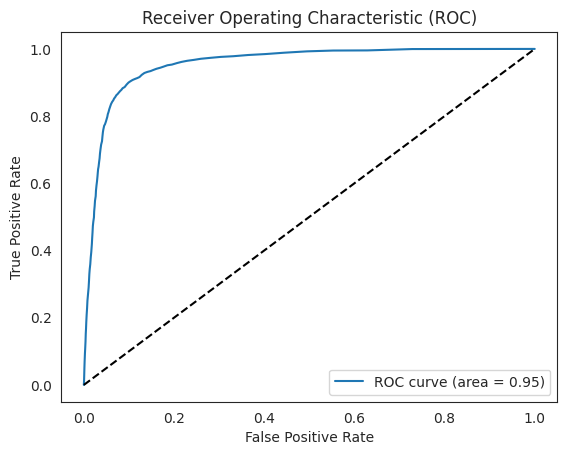

In [249]:
# Assuming y_test and y_pred are defined
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


When using SMOTE or any other resampling technique, the proper sequence is crucial to prevent data leakage. Here’s how you should handle it:

Correct Order:
Train-Test Split First:
Reason: Splitting your data into training and test sets first ensures that the test set remains untouched by any transformations applied to the training data. This preserves the integrity of the evaluation process, ensuring that your model is evaluated on data it has never seen before.
Apply SMOTE on the Training Set Only:
Reason: SMOTE should only be applied to the training data. The purpose of SMOTE is to help the model learn from a balanced dataset during training. Applying SMOTE before the split would cause the same synthetic data to be present in both the training and test sets, leading to overfitting and misleadingly high performance metrics.
Summary:
Step 1: Perform train_test_split to separate your data into training and test sets.
Step 2: Apply SMOTE (or any other resampling technique) only to the training set.
Step 3: Train your model on the balanced training set.
Step 4: Evaluate your model on the untouched test set.
This approach ensures that your model's performance is evaluated fairly and accurately.

Would you like to proceed with any further steps based on this approach?

**PERFORMANCE PREDICTION(REGRESSION):**

In [252]:
ds = df.copy()

In [254]:
#Adding some new features
ds['Interest_Revenue'] = ds['Outstanding_Debt'] * ds['Interest_Rate']
ds['EMI_to_Salary_Percentage'] = (ds['Total_EMI_per_month'] / (ds['Monthly_Inhand_Salary'] + 1e-9) * 100)
ds['Debt_to_Income_Ratio'] = (ds['Outstanding_Debt'] / (ds['Annual_Income'] + 1e-9) * 100)

# Purpose of Adding 1e-9:
# Preventing Division by Zero: If any customer in the dataset has an Annual_Income of zero, dividing by this value would result in a
# division by zero error, which would crash the code or result in undefined values (infinity). Adding a tiny value like 1e-9 ensures that
# the division always happens with a non-zero denominator.
# Negligible Impact: The value 1e-9 (0.000000001) is so small that it has a negligible impact on the resulting ratio.
# It ensures the operation is safe without significantly altering the computed ratio.


#Encoding
ds['Credit_Mix'] = ds['Credit_Mix'].map({'Good':2, 'Standard':1, 'Bad':0})
ds['Credit_Score'] = ds['Credit_Score'].map({'Good':2, 'Standard':1, 'Poor':0})
ds['Payment_of_Min_Amount'] = ds['Payment_of_Min_Amount'].map({'No': 0, 'NM': 1, 'Yes': 2})

ds = pd.get_dummies(ds, columns=['Occupation'], prefix='Occ')
ds = pd.get_dummies(ds, columns=['Payment_Behaviour'], prefix='PayBehaviour')

#Removing unnecessary columns
ds.drop(['ID',	'Customer_ID',	'Month',	'Name', 'SSN', 'Type_of_Loan'], axis=1, inplace=True)


In [255]:
# Define the feature set and the target variable
X = ds.drop(columns=['Interest_Revenue', 'Outstanding_Debt', 'Interest_Rate'])  # Exclude 'Outstanding_Debt' and 'Interest_Rate'
y = ds['Interest_Revenue']

#Feature Selection
# 1. Mutual Information
mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
mi_selected_features = mi_df.head(10)['Feature']
mi_selected_features.to_list()
print("Top 10 variables from Mutual Information Method:", ', '.join(mi_selected_features))
print("---------------------------------------------------------------------------------------------------------")

# 2. Correlation Matrix
correlation_matrix = ds.corr()
corr_threshold = 0.5  # Define a threshold for correlation
corr_selected_features = correlation_matrix['Interest_Revenue'].abs()
corr_selected_features = corr_selected_features[corr_selected_features > corr_threshold].index.drop(['Interest_Revenue', 'Outstanding_Debt', 'Interest_Rate'])
corr_selected_features.to_list()
print("Top 10 variables from Correlation Matrix:", ', '.join(corr_selected_features))
print("---------------------------------------------------------------------------------------------------------")

# 3. Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso.fit(X, y)
# Get the coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
# Select the top 10 features based on the absolute value of their coefficients
top_10_features = coefficients.abs().sort_values(ascending=False).head(10).index.tolist()
# Display the top 10 features
print("Top 10 variables from Lasso Regression:", ', '.join(top_10_features))




Top 10 variables from Mutual Information Method: Debt_to_Income_Ratio, Annual_Income, Amount_invested_monthly, Monthly_Inhand_Salary, Total_EMI_per_month, EMI_to_Salary_Percentage, Changed_Credit_Limit, Age, Delay_from_due_date, Num_Bank_Accounts
---------------------------------------------------------------------------------------------------------
Top 10 variables from Correlation Matrix: Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Mix, Credit_History_Age, Debt_to_Income_Ratio
---------------------------------------------------------------------------------------------------------
Top 10 variables from Lasso Regression: Credit_Mix, Payment_of_Min_Amount, PayBehaviour_High_spent_Medium_value_payments, PayBehaviour_High_spent_Large_value_payments, Num_of_Loan, PayBehaviour_Low_spent_Small_value_payments, Debt_to_Income_Ratio, Credit_Score, PayBehaviour_Low_spent_Medium_value_payments, PayBehaviour_High_spen

In [256]:
important_features = list(set(top_10_features + mi_selected_features.tolist() + corr_selected_features.tolist()))
important_features

['PayBehaviour_Low_spent_Small_value_payments',
 'PayBehaviour_High_spent_Small_value_payments',
 'Total_EMI_per_month',
 'PayBehaviour_High_spent_Medium_value_payments',
 'EMI_to_Salary_Percentage',
 'Num_of_Delayed_Payment',
 'Num_Bank_Accounts',
 'Credit_History_Age',
 'PayBehaviour_High_spent_Large_value_payments',
 'Annual_Income',
 'Payment_of_Min_Amount',
 'Debt_to_Income_Ratio',
 'Age',
 'Num_of_Loan',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Credit_Score',
 'Monthly_Inhand_Salary',
 'PayBehaviour_Low_spent_Medium_value_payments',
 'Delay_from_due_date',
 'Amount_invested_monthly',
 'Changed_Credit_Limit']

In [257]:
print('Number of selected columns are: ', len(important_features))

Number of selected columns are:  23


*Checking multicollinearity*

In [258]:
# extracting the selected independent features
X_selected = ds[important_features]

# creating correlation matrix
correlation_matrix = X_selected.corr()

# finding highly correlated feature pairs
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)

print("Highly correlated pairs of variables and their correlation values:\n")
checked_pairs = set() # To keep track of checked pairs
for col1 in X_selected.columns:
    for col2 in X_selected.columns:
        if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
            if highly_correlated_pairs.loc[col1, col2]:
                correlation_value = correlation_matrix.loc[col1, col2]
                print(f"{col1} - {col2}: {correlation_value:.2f}")
                checked_pairs.add((col1, col2))

Highly correlated pairs of variables and their correlation values:

Num_of_Delayed_Payment - Credit_Mix: -0.76
Num_Bank_Accounts - Credit_Mix: -0.72
Annual_Income - Monthly_Inhand_Salary: 1.00
Annual_Income - Amount_invested_monthly: 0.81
Payment_of_Min_Amount - Credit_Mix: -0.72
Monthly_Inhand_Salary - Amount_invested_monthly: 0.81


In [259]:
#remove Credit_Mix, Annual_Income, Amount_invested_monthly to remove multi-colinearity
features_to_remove = ['Credit_Mix', 'Annual_Income', 'Amount_invested_monthly']
X_reduced = X_selected.drop(columns=features_to_remove)

In [260]:
# Convert Boolean columns to integers
X_final = X_reduced.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Display VIF values
print(vif_data)


                                          Feature        VIF
0     PayBehaviour_Low_spent_Small_value_payments   3.339366
1    PayBehaviour_High_spent_Small_value_payments   1.955705
2                             Total_EMI_per_month   4.750967
3   PayBehaviour_High_spent_Medium_value_payments   2.635405
4                        EMI_to_Salary_Percentage   4.780405
5                          Num_of_Delayed_Payment  10.598303
6                               Num_Bank_Accounts  10.358449
7                              Credit_History_Age   8.357418
8    PayBehaviour_High_spent_Large_value_payments   2.324142
9                           Payment_of_Min_Amount   5.557696
10                           Debt_to_Income_Ratio   2.971852
11                                            Age   9.656611
12                                    Num_of_Loan   7.557035
13                                Num_Credit_Card  11.427282
14                           Num_Credit_Inquiries   6.871452
15                      

In [261]:
#selecting features and target variable
X_no_multi = X_reduced
y = ds['Interest_Revenue']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_multi)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R2 Score: 0.9928859346593716
RMSE: 2789.9044524479996
MAE: 1017.238913695002


In [262]:
#Doing Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Average R2 score:", cv_scores.mean())

Cross-validated R2 scores: [0.86848151 0.86007028 0.86933361 0.8455002  0.87138441]
Average R2 score: 0.8629540004251627
